<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/3.%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).%20%D0%9A%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8.%20%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## 1.3. Визуализируем часть данных из датасета

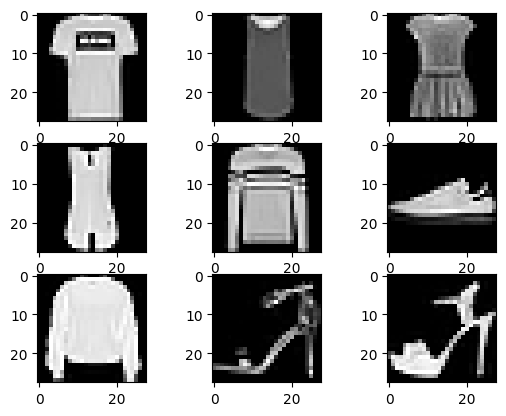

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вывод информации о модели
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [ ]:
# Изменение размерности данных и нормализация
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255.0
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Обучение модели
history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.7733 - loss: 0.6256 - val_accuracy: 0.8631 - val_loss: 0.3731
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 0.8863 - loss: 0.3111 - val_accuracy: 0.8881 - val_loss: 0.3062
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9061 - loss: 0.2571 - val_accuracy: 0.8931 - val_loss: 0.2847
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9174 - loss: 0.2213 - val_accuracy: 0.9074 - val_loss: 0.2550
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9289 - loss: 0.1911 - val_accuracy: 0.9120 - val_loss: 0.2467
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9386 - loss: 0.1669 - val_accuracy: 0.8923 - val_loss: 0.2996
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9440 - loss: 0.1509 - val_accuracy: 0.9082 - val_loss: 0.2636
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9507 -

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


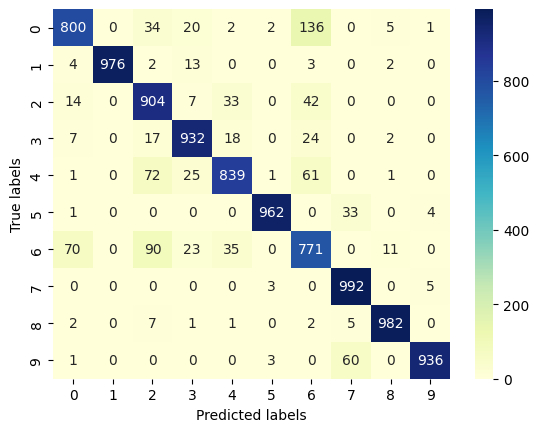

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Получаем предсказания модели (вероятности для каждого класса)
Y_pred = model.predict(testX, batch_size=10)

# Преобразуем вероятности в метки классов
Y_pred_labels = Y_pred.argmax(axis=1)

Y_val_labels = testy

# Строим матрицу ошибок
conf_mat = confusion_matrix(Y_val_labels, Y_pred_labels)

# Визуализация
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

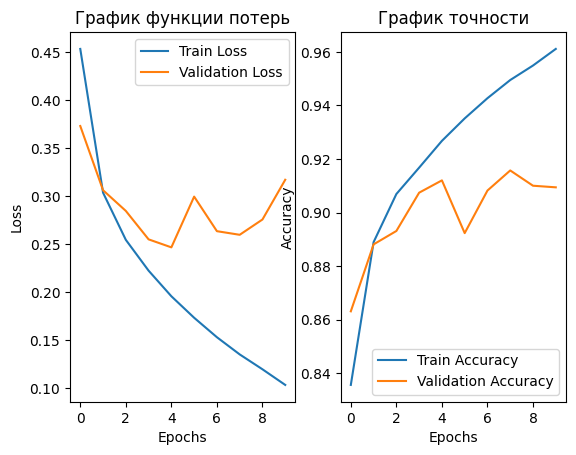

In [ ]:
# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('График функции потерь')

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('График точности')

plt.show()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_path = 'drive/MyDrive/neural_networks/3lab/'

Mounted at /content/drive


drive/MyDrive/neural_networks/3lab/validation_svert/bag.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Предсказанный класс: Bag (99.53%)


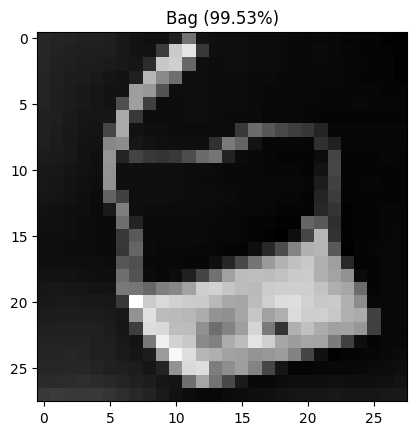

drive/MyDrive/neural_networks/3lab/validation_svert/dress.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Предсказанный класс: Dress (99.14%)


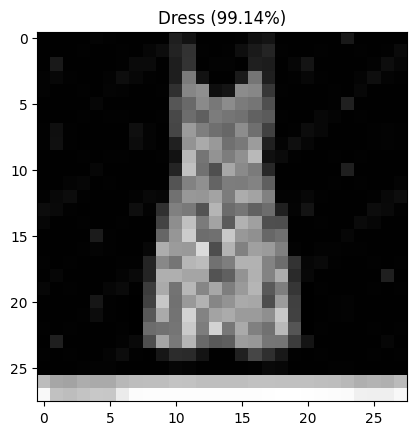

drive/MyDrive/neural_networks/3lab/validation_svert/trousers.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Предсказанный класс: Trouser (99.99%)


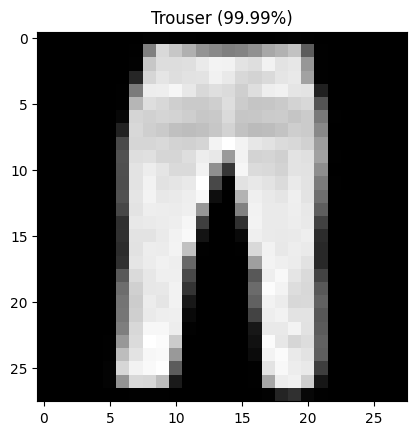

drive/MyDrive/neural_networks/3lab/validation_svert/sneaker.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Предсказанный класс: Sandal (92.95%)


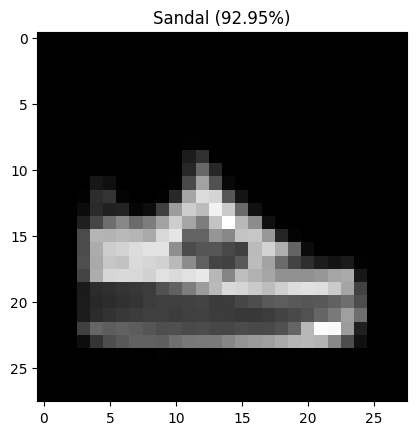

drive/MyDrive/neural_networks/3lab/validation_svert/tshirt.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Предсказанный класс: T-shirt/top (58.05%)


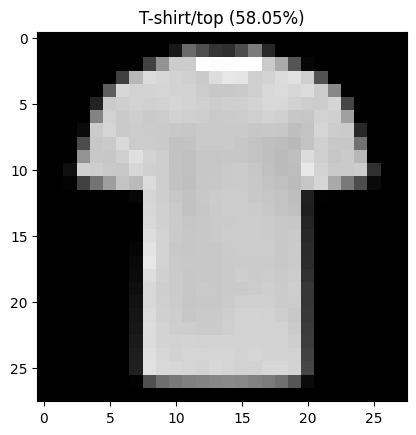

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загружаем в градациях серого

    # Проверяем, нужно ли инвертировать цвета
    if np.mean(image) > 127:  # Если изображение слишком светлое → инвертируем
        image = 255 - image

    # Улучшаем контраст (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)

    # Изменяем размер (с сохранением четкости)
    image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)

    # Нормализация (0-1)
    image = image.astype('float32') / 255.0

    # Преобразуем в нужную форму (1, 28, 28, 1)
    return image.reshape(1, 28, 28, 1)

def predict_custom_image(image_path):
    image = preprocess_image(image_path)

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    print(f"Предсказанный класс: {class_labels[predicted_class]} ({confidence:.2f}%)")

    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"{class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()

image_paths = ["bag.jpg", "dress.jpg", "trousers.jpg", "sneaker.jpeg", "tshirt.jpg"]
for img_path in image_paths:
    img_path = drive_path + 'validation_svert/' + img_path
    predict_custom_image(img_path)


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
import shutil
shutil.rmtree('dataset')

In [ ]:
import zipfile
import os

zip_path = 'drive/MyDrive/neural_networks/dataset.zip'
extract_dir = '.'

# Создаем папку для распаковки, если её нет
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dir = 'dataset'
classes = ['cars', 'motorbike', 'bus']
img_size = (128, 128)

X = []
y = []

for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        # Пропускаем скрытые файлы и не-JPG файлы
        if img_name.startswith('.') or not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)
            X.append(np.array(img))
            y.append(class_idx)
        except Exception as e:
            print(f"Ошибка при обработке {img_path}: {e}")
            continue

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3914 - loss: 1.1108 - val_accuracy: 0.6150 - val_loss: 0.8645
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6104 - loss: 0.8809 - val_accuracy: 0.6800 - val_loss: 0.7307
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.6863 - loss: 0.7429 - val_accuracy: 0.7450 - val_loss: 0.5813
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.6885 - loss: 0.7260 - val_accuracy: 0.8217 - val_loss: 0.4377
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.7285 - loss: 0.6644 - val_accuracy: 0.8517 - val_loss: 0.4091
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7357 - loss: 0.6246 - val_accuracy: 0.8683 - val_loss: 0.3587
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7874 - loss: 0.5383 - val_accuracy: 0.8883 - val_loss: 0.3154
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.7957 - loss: 0.5351 - val_accuracy: 0.8867 - val_lo

In [ ]:
model.save('car_mt_bus.keras')

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
##ALEXNET
alexnet_model = Sequential([
    # 1-й сверточный блок
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),

    # 2-й сверточный блок
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),

    # 3-й сверточный блок
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 4-й сверточный блок
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 5-й сверточный блок
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),

    # Полносвязные слои
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Создаем модель
alexnet_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

alexnet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,740,611 (94.38 MB)

 Trainable params: 24,739,907 (94.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

history = alexnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.4492 - loss: 1.1868 - val_accuracy: 0.3650 - val_loss: 1.0811
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.6587 - loss: 0.7812 - val_accuracy: 0.4133 - val_loss: 1.0498
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.7370 - loss: 0.6442 - val_accuracy: 0.6800 - val_loss: 0.9862
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7447 - loss: 0.6206 - val_accuracy: 0.6167 - val_loss: 0.8749
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7938 - loss: 0.5001 - val_accuracy: 0.7383 - val_loss: 0.7455
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7977 - loss: 0.5011 - val_accuracy: 0.5583 - val_loss: 0.8708
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8309 - loss: 0.4279 - val_accuracy: 0.7167 - val_loss: 0.6632
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8338 - loss: 0.4390 - val_accuracy: 0.7333 - v

## 2.3. Сохраните полученные модели

In [ ]:
alexnet_model.save(drive_path + 'alextnet_car_mt_bus.keras')

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
from tensorflow.keras.models import load_model
lab2_model = load_model("drive/MyDrive/neural_networks/2lab/2lab_car_mt_bus.keras")


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import cv2

models = {
    "Моя сверточная модель": load_model(drive_path + 'car_mt_bus.keras'),
    "AlexNet": load_model(drive_path + 'alextnet_car_mt_bus.keras'),
    "2lab": load_model('drive/MyDrive/neural_networks/2lab/2lab_car_mt_bus.keras')
}

def predict_with_all_models(img_path, models):
    """Предсказывает класс для изображения используя все модели"""
    try:
        # Загрузка изображения
        img = image.load_img(img_path)
        img_array = image.img_to_array(img) / 255.0

        # Классы
        classes = {0: 'car', 1: 'motorbike', 2: 'bus'}

        # Получаем предсказания
        results = []
        for model_name, model in models.items():
            try:
                if model_name == "2lab":
                    img_processed = cv2.resize(img_array, (64, 64)).reshape(1, -1)
                else:
                    img_processed = cv2.resize(img_array, (128, 128))
                    img_processed = np.expand_dims(img_processed, axis=0)

                pred = model.predict(img_processed, verbose=0)
                class_idx = np.argmax(pred[0])
                confidence = np.max(pred[0])
                results.append(f"{model_name}: {classes[class_idx]} ({confidence:.2%})")

            except Exception as e:
                print(f"Ошибка в модели {model_name}: {str(e)}")
                continue

        print("\nРезультаты классификации:")
        for res in results:
            print(f"- {res}")

        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        return results

    except Exception as e:
        print(f"Ошибка обработки {img_path}: {str(e)}")
        return None

# Получаем все изображения
image_extensions = ('.jpg', '.jpeg', '.JPG', '.JPEG')
image_path = os.path.join(drive_path, "15_test")
image_files = [os.path.join(image_path, f) for f in os.listdir(image_path)
              if f.lower().endswith(image_extensions) and os.path.isfile(os.path.join(image_path, f))]

# Обрабатываем все изображения
for img_path in sorted(image_files):
    predict_with_all_models(img_path, models)

Output hidden; open in https://colab.research.google.com to view.

Сверточные нейронные сети лучше справляются с классификацией изображений

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

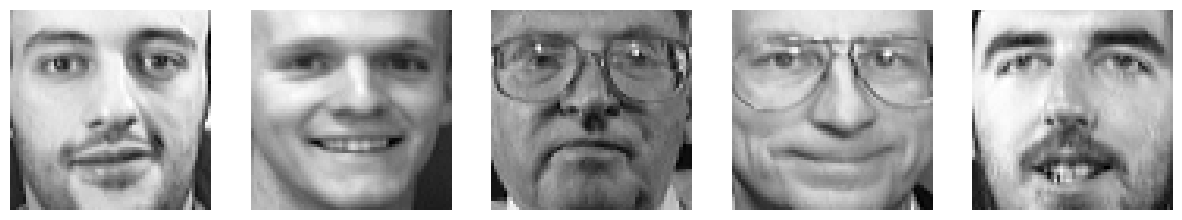

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

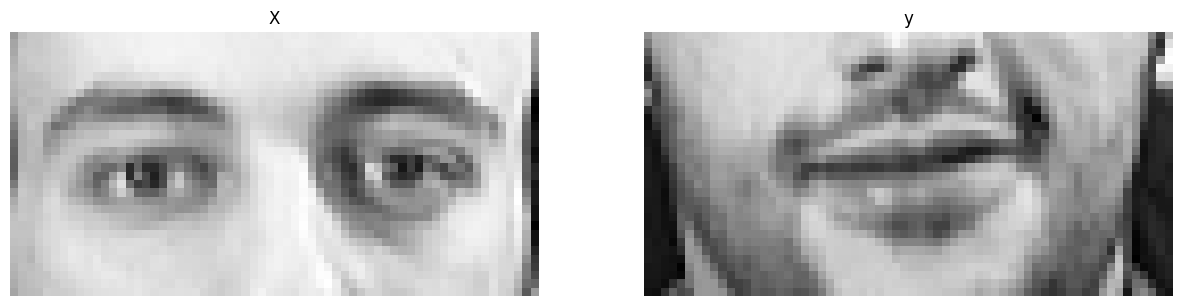

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten, Dense, MaxPooling2D

model = Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(32*64,  activation='sigmoid')
])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 64, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2048)                │       8,390,656 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,024,256 (160.31 MB)

 Trainable params: 42,024,256 (160.31 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
y_train = y_train.reshape(len(y_train), 2048)
y_test = y_test.reshape(len(y_test), 2048)

print(y_train.shape)
print(y_test.shape)

(320, 2048)
(80, 2048)


## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
             loss='mse',
             metrics=['mse'])

history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0175 - val_mse: 0.0175
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - loss: 0.0180 - mse: 0.0180


[0.017471617087721825, 0.017471617087721825]

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
preds = model.predict(X_test, batch_size=16)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.10597336292266846

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
# Ваш код здесь

preds = preds.reshape(80, 32, 64)
y_test = y_test.reshape(80, 32, 64)

preds.shape

(80, 32, 64)

Отрисуйте все предсказания.

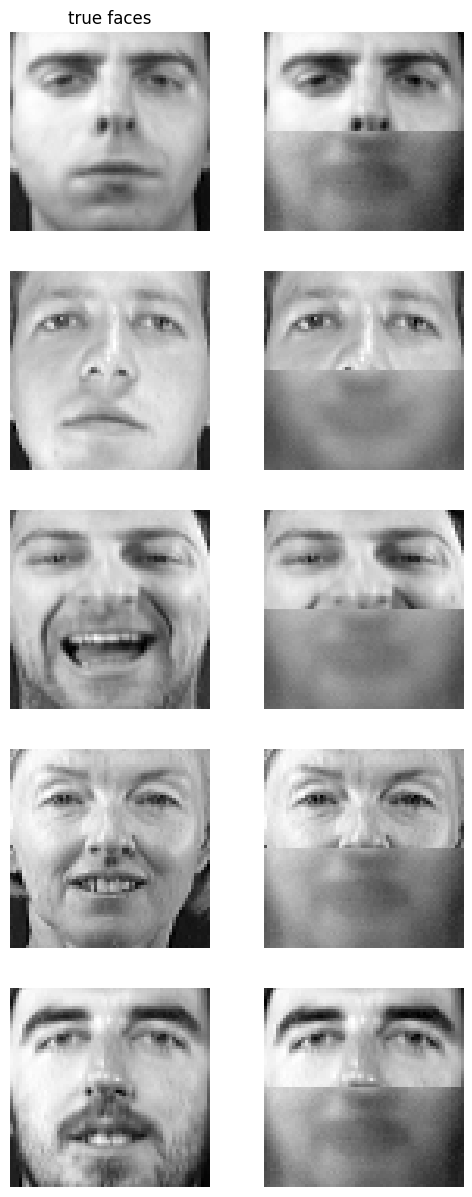

In [ ]:
# Пример кода:
import numpy as np
n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], preds[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )